## Mobility data and its effect on unemployment rate in times of COVID19

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plot images
import datetime #convert str to datetime
import matplotlib.dates as mdates

### Mobility data by county

In [356]:
df = pd.read_csv('safegraph_unemp.csv')
df.head()

,day,month,date,county,state,county_state,device_count,distance_traveled_from_home,completely_home_device_count,median_home_dwell_time,unemp_rate_perc
0,31,1,1/31/20,Aleutians East,AK,Aleutians East AK,24,530406,5,228,4.2
1,31,1,1/31/20,Aleutians West,AK,Aleutians West AK,72,3623606,21,106,3.4
2,31,1,1/31/20,Anchorage,AK,Anchorage AK,10999,1301674,1715,117263,5.1
3,31,1,1/31/20,Bethel,AK,Bethel AK,215,54304,49,1399,12.8
4,31,1,1/31/20,Bristol Bay,AK,Bristol Bay AK,16,5753,4,166,14.0


In [357]:
df[df.month == 1].mean()

day                                 31.000000
month                                1.000000
device_count                      5007.169264
distance_traveled_from_home     666874.070449
completely_home_device_count       805.881546
median_home_dwell_time           45943.965399
unemp_rate_perc                      4.785630
dtype: float64

In [358]:
df[df.month == 2].mean()

day                                 29.000000
month                                2.000000
device_count                      6389.435298
distance_traveled_from_home     667777.523854
completely_home_device_count      1615.267540
median_home_dwell_time           41808.165263
unemp_rate_perc                      4.457780
dtype: float64

In [361]:
import statsmodels.formula.api as smf

smf.ols('unemp_rate_perc ~  median_home_dwell_time + C(date)', df).fit().summary()
# add C(county) to the regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        unemp_rate_perc   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     39.70
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           7.32e-18
Time:                        12:56:36   Log-Likelihood:                -14047.
No. Observations:                6415   AIC:                         2.810e+04
Df Residuals:                    6412   BIC:                         2.812e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.8422      0.039    123.696      0.000       4.765       4.919
C(date)[T.2/29/20]        -0.3329      0.054     -6.166      0.000      -0.439      -0.227
median_home_dwell_time -1.231e-06   1.89e-07     -6.521      0.000    -1.6e-06   -8.61e-07
==============================================================================
Omnibus:                     3624.016   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35686.942
Skew:                           2.559   Prob(JB):                         0.00
Kurtosis:                      13.359   Cond. No.                     3.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There doesn't seem to be any effect on the county level. The reason might be that by February, people were not taking measures to avoid contracting the virus yet. Let's analyze by state level.

### Aggregate mobility data by state

In [362]:
# Aggregate by state taking the mean

safegraph = pd.read_csv("SafeGraph_data.csv")
safegraph['date'] = pd.to_datetime(safegraph['date'])
safegraph_group = safegraph[['date', 'state', 'median_home_dwell_time', 'distance_traveled_from_home']]

safegraph.head()

,day,month,date,county,state,county_state,device_count,distance_traveled_from_home,completely_home_device_count,median_home_dwell_time
0,1,1,2020-01-01,Aleutians East,AK,Aleutians East AK,27,2614453,10,1205
1,1,1,2020-01-01,Aleutians West,AK,Aleutians West AK,87,14302,31,2040
2,1,1,2020-01-01,Anchorage,AK,Anchorage AK,14510,3709086,5170,138441
3,1,1,2020-01-01,Bethel,AK,Bethel AK,271,1322089,79,3208
4,1,1,2020-01-01,Bristol Bay,AK,Bristol Bay AK,17,240932,12,386


In [363]:
# Take the median of home_dwell_time by state

safegraph_group = safegraph_group.groupby(['date', 'state']).median().reset_index()
safegraph_group.head(2)

,date,state,median_home_dwell_time,distance_traveled_from_home
0,2020-01-01,AK,2040.0,707970.0
1,2020-01-01,AL,23625.0,305166.0


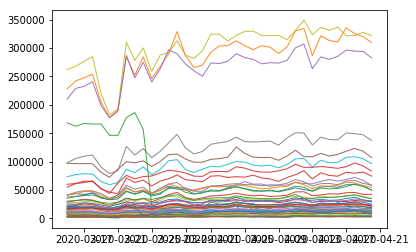

In [364]:
# Pivot table to plot all the trends after 3-15-2020
df = safegraph_group[safegraph_group.date >= '3-15-2020'].pivot(index='date', 
                                                                columns='state', 
                                                                values='median_home_dwell_time')
 
for column in df:
  plt.plot(df[column], marker='', linewidth=1, alpha=0.9, label=column)

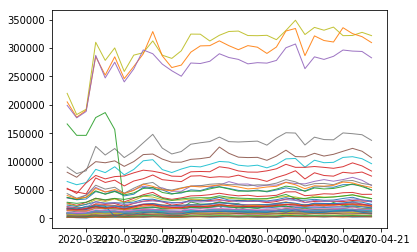

In [365]:
# Pivot table to plot all the trends after 3-19-2020
df = safegraph_group[safegraph_group.date >= '3-19-2020'].pivot(index='date', 
                                                                columns='state', 
                                                                values='median_home_dwell_time')
 
for column in df:
  plt.plot(df[column], marker='', linewidth=1, alpha=0.9, label=column)


In [367]:
safegraph_group[(safegraph_group.state == 'NC') & (safegraph_group.date >= '3-15-2020')].head(10)

,date,state,median_home_dwell_time,distance_traveled_from_home
4152,2020-03-15,NC,20323.5,360143.5
4208,2020-03-16,NC,21032.5,402465.0
4264,2020-03-17,NC,21579.5,404592.0
4320,2020-03-18,NC,21066.0,388124.0
4376,2020-03-19,NC,18380.0,404116.0
4432,2020-03-20,NC,16135.5,394748.0
4488,2020-03-21,NC,15872.0,345985.0
4544,2020-03-22,NC,23297.0,279547.5
4600,2020-03-23,NC,21402.0,372087.5
4655,2020-03-24,NC,22011.5,374671.5


In [368]:
# Create week indicator to aggregate by week 
safegraph_group.loc[(safegraph_group['date'] >= '01-05-2020') & 
                    (safegraph_group.date <= '01-11-2020'), 'week_ended'] = '01-11-2020'
safegraph_group.loc[(safegraph_group['date'] >= '01-12-2020') & 
                    (safegraph_group.date <= '01-18-2020'), 'week_ended'] = '01-18-2020'
safegraph_group.loc[(safegraph_group['date'] >= '01-19-2020') & 
                    (safegraph_group.date <= '01-25-2020'), 'week_ended'] = '01-25-2020'
safegraph_group.loc[(safegraph_group['date'] >= '01-26-2020') & 
                    (safegraph_group.date <= '02-1-2020'), 'week_ended'] = '02-1-2020'

safegraph_group.loc[(safegraph_group['date'] >= '02-02-2020') & 
                    (safegraph_group.date <= '02-8-2020'), 'week_ended'] = '02-8-2020'
safegraph_group.loc[(safegraph_group['date'] >= '02-09-2020') & 
                    (safegraph_group.date <= '02-15-2020'), 'week_ended'] = '02-15-2020'
safegraph_group.loc[(safegraph_group['date'] >= '02-16-2020') & 
                    (safegraph_group.date <= '02-22-2020'), 'week_ended'] = '02-22-2020'
safegraph_group.loc[(safegraph_group['date'] >= '02-23-2020') & 
                    (safegraph_group.date <= '02-29-2020'), 'week_ended'] = '02-29-2020'

safegraph_group.loc[(safegraph_group['date'] >= '03-01-2020') & 
                    (safegraph_group.date <= '03-07-2020'), 'week_ended'] = '03-07-2020'
safegraph_group.loc[(safegraph_group['date'] >= '03-08-2020') & 
                    (safegraph_group.date <= '03-14-2020'), 'week_ended'] = '03-14-2020'
safegraph_group.loc[(safegraph_group['date'] >= '03-15-2020') & 
                    (safegraph_group.date <= '03-21-2020'), 'week_ended'] = '03-21-2020'
safegraph_group.loc[(safegraph_group['date'] >= '03-22-2020') & 
                    (safegraph_group.date <= '03-28-2020'), 'week_ended'] = '03-28-2020'

safegraph_group.loc[(safegraph_group['date'] >= '03-29-2020') & 
                    (safegraph_group.date <= '04-04-2020'), 'week_ended'] = '04-04-2020'
safegraph_group.loc[(safegraph_group['date'] >= '04-05-2020') & 
                    (safegraph_group.date <= '04-11-2020'), 'week_ended'] = '04-11-2020'


In [369]:
# Group by week and state
safegraph_group_2 = safegraph_group[(safegraph_group.date>='01-05-2020') & (safegraph_group.date<='04-11-2020')]
safegraph_group_2 = safegraph_group_2[['state', 'week_ended', 'median_home_dwell_time', 'distance_traveled_from_home']]
safegraph_group_2 = safegraph_group_2.groupby(['week_ended', 'state']).median().reset_index()
safegraph_group_2.head()


,week_ended,state,median_home_dwell_time,distance_traveled_from_home
0,01-11-2020,AK,2699.0,443022.0
1,01-11-2020,AL,21419.0,341522.0
2,01-11-2020,AR,11530.0,176585.0
3,01-11-2020,AS,3106.5,1071990.0
4,01-11-2020,AZ,52884.0,1013871.0


In [370]:
# Prepare unemployment claims dataset to merge with mobility data

unemp = pd.read_csv('unemployment_2016_2020.csv')
unemp['Filed week ended'] = pd.to_datetime(unemp['Filed week ended'])


unemp.rename(columns = {'Initial Claims':'initial_claims',
                       'Filed week ended':'week_ended',
                       'State':'state'}, inplace = True) 

unemp = unemp[['state', 'week_ended', 'initial_claims']]
unemp = unemp[unemp.week_ended >= '01-05-2020']
unemp.head()

,state,week_ended,initial_claims
105,AL,2020-01-11,3629.0
106,AL,2020-01-18,2483.0
107,AL,2020-01-25,2129.0
108,AL,2020-02-01,2170.0
109,AL,2020-02-08,2176.0


In [371]:
# Prepare mobility data to merge with unemployment claims 

mobility = safegraph_group_2[['state', 'week_ended', 'median_home_dwell_time', 'distance_traveled_from_home']]
mobility['week_ended'] = pd.to_datetime(mobility['week_ended'])
mobility.head()

,state,week_ended,median_home_dwell_time,distance_traveled_from_home
0,AK,2020-01-11,2699.0,443022.0
1,AL,2020-01-11,21419.0,341522.0
2,AR,2020-01-11,11530.0,176585.0
3,AS,2020-01-11,3106.5,1071990.0
4,AZ,2020-01-11,52884.0,1013871.0


In [381]:
# Merge with unemployment claims data 

mobility_unemp = pd.merge(unemp, mobility, how='inner', left_on=['state', 'week_ended'], right_on=['state', 'week_ended'])
mobility_unemp.dropna()
mobility_unemp.head()

,state,week_ended,initial_claims,median_home_dwell_time,distance_traveled_from_home
0,AL,2020-01-11,3629.0,21419.0,341522.0
1,AL,2020-01-18,2483.0,21108.0,329292.0
2,AL,2020-01-25,2129.0,21167.0,353442.0
3,AL,2020-02-01,2170.0,20498.0,353218.0
4,AL,2020-02-08,2176.0,20923.0,326798.0


In [382]:
mobility_unemp.dtypes

state                                  object
week_ended                     datetime64[ns]
initial_claims                        float64
median_home_dwell_time                float64
distance_traveled_from_home           float64
dtype: object

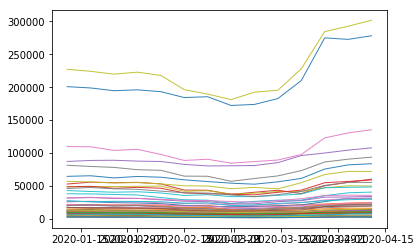

In [392]:
# Let's see the trend

mobility_unemp_g = mobility_unemp.pivot(index='week_ended', columns='state', values='median_home_dwell_time')
 
for column in mobility_unemp_g:
  plt.plot(mobility_unemp_g[column], marker='', linewidth=1, alpha=0.9, label=column)


$$Unemployment \; insurance \; claims= \alpha + \beta_{1} \; Dwell \;time\;at\;home_{median} + \beta_{2} \; State \;+ \beta_{3} \; Week_{2020} + \epsilon$$

In [414]:
import statsmodels.formula.api as smf

smf.ols('initial_claims ~ median_home_dwell_time + state + week_ended', mobility_unemp).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         initial_claims   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     10.86
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.83e-66
Time:                        16:34:42   Log-Likelihood:                -8665.4
No. Observations:                 700   AIC:                         1.746e+04
Df Residuals:                     636   BIC:                         1.775e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                      -2.469e+04   1.81e+04     -1.361      0.174   -6.03e+04    1.09e+04
state[T.AL]                                    -2850.1542   2.35e+04     -0.121      0.904    -4.9e+04    4.33e+04
state[T.AR]                                    -2419.4774    2.3e+04     -0.105      0.916   -4.75e+04    4.27e+04
state[T.AZ]                                    -2.643e+04   2.69e+04     -0.984      0.326   -7.92e+04    2.63e+04
state[T.CA]                                     1.369e+05   3.51e+04      3.900      0.000    6.79e+04    2.06e+05
state[T.CO]                                     1.039e+04   2.28e+04      0.455      0.649   -3.45e+04    5.52e+04
state[T.CT]                                    -1.015e+05   3.84e+04     -2.641      0.008   -1.77e+05    -2.6e+04
state[T.DE]                                    -7.664e+04   3.17e+04     -2.417      0.016   -1.39e+05   -1.44e+04
state[T.FL]                                      280.1331   2.63e+04      0.011      0.992   -5.14e+04     5.2e+04
state[T.GA]                                     5.399e+04   2.29e+04      2.355      0.019    8973.268     9.9e+04
state[T.HI]                                    -5.933e+04   2.96e+04     -2.002      0.046   -1.18e+05   -1148.410
state[T.IA]                                     4376.1143   2.29e+04      0.191      0.849   -4.07e+04    4.94e+04
state[T.ID]                                    -1401.2129   2.29e+04     -0.061      0.951   -4.63e+04    4.35e+04
state[T.IL]                                     3.359e+04   2.32e+04      1.447      0.148    -1.2e+04    7.92e+04
state[T.IN]                                      1.16e+04   2.34e+04      0.496      0.620   -3.43e+04    5.75e+04
state[T.KS]                                     5722.7973   2.28e+04      0.251      0.802   -3.91e+04    5.05e+04
state[T.KY]                                     1.841e+04   2.29e+04      0.803      0.422   -2.66e+04    6.34e+04
state[T.LA]                                     7864.6183   2.32e+04      0.339      0.734   -3.76e+04    5.34e+04
state[T.MA]                                    -1.987e+05    7.2e+04     -2.758      0.006    -3.4e+05   -5.72e+04
state[T.MD]                                    -2.082e+04   2.56e+04     -0.815      0.416    -7.1e+04    2.94e+04
state[T.ME]                                     -1.99e+04   2.37e+04     -0.839      0.402   -6.65e+04    2.67e+04
state[T.MI]                                      5.75e+04   2.34e+04      2.459      0.014    1.16e+04    1.03e+05
state[T.MN]                                     1.969e+04    2.3e+04      0.857      0.392   -2.54e+04    6.48e+04
state[T.MO]                                      1.39e+04    2.3e+04      0.605      0.545   

### Back to county level but only for California counties

From which we do have unemployment data for March!

In [394]:
### Some graphs

graph_cal = pd.read_csv('unemp_counties_CAL_graph.csv', low_memory=False)
graph_cal = graph_cal[['county', 'date', 'unemp_rate']]
graph_cal['date'] = pd.to_datetime(graph_cal['date'])
graph_cal["unemp_rate"] = pd.to_numeric(graph_cal.unemp_rate, errors='coerce')

graph_cal.head(3)

,county,date,unemp_rate
0,Alameda County,2019-01-01,3.4
1,Alameda County,2019-02-01,3.1
2,Alameda County,2019-03-01,3.1


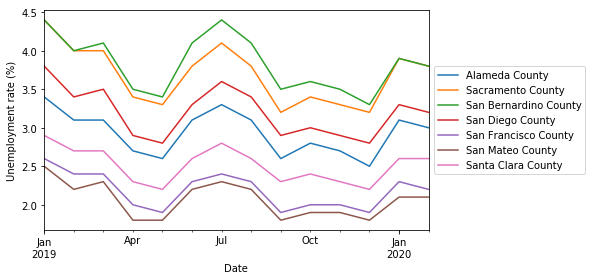

In [396]:
# Let's see the trend in some counties
graph_cal.pivot(index='date', columns = 'county', values = 'unemp_rate').plot()
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol =1)
plt.tight_layout()


plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol =1)
plt.xlabel('Date')
plt.ylabel('Unemployment rate (%)')
plt.gcf().set_size_inches(10,4)
plt.show()

### Analysis (with all California's counties)

In [397]:
cal_unemp = pd.read_csv('california_bycounty.csv')
cal_unemp['date'] = pd.to_datetime(cal_unemp['date'])

cal_unemp.head(2)

,date,month,Area,state_county_code,unemp_rate
0,2020-01-31,1.0,Alameda County,6001.0,3.1
1,2020-02-29,2.0,Alameda County,6001.0,3.0


In [399]:
cal_mobility = pd.read_csv('SafeGraph_CA.csv')
cal_mobility['date'] = pd.to_datetime(cal_mobility['date'])

# Group mobility as median by month and county 
cal_mobility = cal_mobility[['month', 'state_county_code', 'county','median_home_dwell_time', 'distance_traveled_from_home']]
cal_mobility = cal_mobility.groupby(['month', 'state_county_code', 'county']).median().reset_index()
cal_mobility.head()

,month,state_county_code,county,median_home_dwell_time,distance_traveled_from_home
0,1,6001,Alameda,720651.0,14236325.0
1,1,6003,Alpine,814.0,50336.0
2,1,6005,Amador,20298.0,423155.0
3,1,6007,Butte,123894.0,2366224.0
4,1,6009,Calaveras,19685.0,666565.0


In [400]:
cal = pd.merge(cal_unemp[['month', 'state_county_code', 'unemp_rate']], 
               cal_mobility[['month', 'state_county_code', 'county','median_home_dwell_time', 'distance_traveled_from_home']], left_on=['month', 'state_county_code'], right_on=['month', 'state_county_code'])
cal.head()

,month,state_county_code,unemp_rate,county,median_home_dwell_time,distance_traveled_from_home
0,1.0,6001.0,3.1,Alameda,720651.0,14236325.0
1,2.0,6001.0,3.0,Alameda,714263.0,11893923.0
2,3.0,6001.0,3.8,Alameda,832631.0,14477660.0
3,1.0,6003.0,4.6,Alpine,814.0,50336.0
4,2.0,6003.0,5.0,Alpine,721.0,45657.0


$$Unemployment \; rate_{CA} = \alpha + \beta_{1} \; Dwell \;time\;at\;home_{median} + \beta_{2} \; County \;+ \beta_{3} \; Month_{2020} + \epsilon$$

In [411]:
import statsmodels.formula.api as smf

smf.ols('unemp_rate ~ median_home_dwell_time + county + month', cal).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unemp_rate   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     104.4
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.44e-77
Time:                        15:08:54   Log-Likelihood:                -121.92
No. Observations:                 174   AIC:                             363.8
Df Residuals:                     114   BIC:                             553.4
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.2055      0.822      1.467      0.145      -0.422       2.833
county[T.Alpine]              2.9064      0.912      3.189      0.002       1.101       4.712
county[T.Amador]              2.1574      0.896      2.409      0.018       0.383       3.932
county[T.Butte]               3.1342      0.808      3.880      0.000       1.534       4.734
county[T.Calaveras]           1.9574      0.896      2.185      0.031       0.183       3.732
county[T.Colusa]             17.7962      0.901     19.747      0.000      16.011      19.581
county[T.Contra Costa]        0.3624      0.563      0.643      0.521      -0.754       1.478
county[T.Del Norte]           4.0953      0.900      4.549      0.000       2.312       5.879
county[T.El Dorado]           1.3003      0.839      1.549      0.124      -0.362       2.963
county[T.Fresno]              6.1362      0.612     10.035      0.000       4.925       7.348
county[T.Glenn]               5.0271      0.899      5.593      0.000       3.247       6.808
county[T.Humboldt]            1.5884      0.860      1.846      0.067      -0.116       3.293
county[T.Imperial]           15.7891      0.861     18.338      0.000      14.083      17.495
county[T.Inyo]                1.5318      0.903      1.695      0.093      -0.258       3.321
county[T.Kern]                6.9802      0.671     10.407      0.000       5.651       8.309
county[T.Kings]               7.7966      0.868      8.978      0.000       6.076       9.517
county[T.Lake]                3.5843      0.889      4.030      0.000       1.823       5.346
county[T.Lassen]              3.5282      0.900      3.921      0.000       1.746       5.311
county[T.Los Angeles]        -1.3642      3.907     -0.349      0.728      -9.103       6.375
county[T.Madera]              6.1629      0.868      7.100      0.000       4.443       7.882
county[T.Marin]              -0.1940      0.813     -0.239      0.812      -1.804       1.416
county[T.Mariposa]            4.0657      0.904      4.497      0.000       2.275       5.857
county[T.Mendocino]           2.4341      0.873      2.790      0.006       0.706       4.163
county[T.Merced]              8.2889      0.828     10.007      0.000       6.648       9.930
county[T.Modoc]               7.6676      0.906      8.463      0.000       5.873       9.462
county[T.Mono]                1.4013      0.906      1.546      0.125      -0.394       3.197
county[T.Monterey]            7.7116      0.786      9.805      0.000       6.154       9.270
county[T.Napa]                0.8468      0.852      0.994      0.322      -0.841       2.535
county[T.Nevada]              1.2625      0.868      1.455      0.148      -0.456       2.981
county[T.Orange]             -0.7530      0.826     -0.912      0.364      

In [412]:
# Now, let's take data from january and march only

cal_2 = cal[(cal.month==1) | (cal.month==3)]
cal_2.head()

,month,state_county_code,unemp_rate,county,median_home_dwell_time,distance_traveled_from_home
0,1.0,6001.0,3.1,Alameda,720651.0,14236325.0
2,3.0,6001.0,3.8,Alameda,832631.0,14477660.0
3,1.0,6003.0,4.6,Alpine,814.0,50336.0
5,3.0,6003.0,7.1,Alpine,1549.0,37488.0
6,1.0,6005.0,4.7,Amador,20298.0,423155.0


In [413]:
import statsmodels.formula.api as smf

smf.ols('unemp_rate ~ median_home_dwell_time + county + month', cal_2).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unemp_rate   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     81.89
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           3.54e-39
Time:                        15:12:43   Log-Likelihood:                -57.504
No. Observations:                 116   AIC:                             235.0
Df Residuals:                      56   BIC:                             400.2
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.7084      0.976      2.775      0.007       0.753       4.663
county[T.Alpine]              1.6299      1.082      1.507      0.138      -0.537       3.797
county[T.Amador]              0.8482      1.063      0.798      0.428      -1.282       2.978
county[T.Butte]               2.0535      0.960      2.139      0.037       0.130       3.976
county[T.Calaveras]           0.6485      1.063      0.610      0.544      -1.481       2.778
county[T.Colusa]             16.5918      1.070     15.509      0.000      14.449      18.735
county[T.Contra Costa]       -0.1205      0.656     -0.184      0.855      -1.435       1.195
county[T.Del Norte]           2.8431      1.069      2.661      0.010       0.702       4.984
county[T.El Dorado]           0.0670      0.995      0.067      0.947      -1.927       2.061
county[T.Fresno]              5.6332      0.720      7.825      0.000       4.191       7.075
county[T.Glenn]               3.7947      1.067      3.557      0.001       1.657       5.932
county[T.Humboldt]            0.3405      1.021      0.333      0.740      -1.705       2.386
county[T.Imperial]           15.0908      1.021     14.781      0.000      13.046      17.136
county[T.Inyo]                0.1395      1.072      0.130      0.897      -2.008       2.287
county[T.Kern]                6.3881      0.794      8.046      0.000       4.798       7.979
county[T.Kings]               6.6809      1.031      6.482      0.000       4.616       8.746
county[T.Lake]                2.3063      1.055      2.186      0.033       0.192       4.420
county[T.Lassen]              2.1936      1.068      2.054      0.045       0.054       4.333
county[T.Los Angeles]         5.8837      4.667      1.261      0.213      -3.466      15.233
county[T.Madera]              5.1322      1.030      4.985      0.000       3.070       7.195
county[T.Marin]              -1.3987      0.962     -1.454      0.152      -3.326       0.528
county[T.Mariposa]            2.7388      1.073      2.553      0.013       0.590       4.888
county[T.Mendocino]           1.1765      1.035      1.137      0.261      -0.897       3.250
county[T.Merced]              7.2296      0.983      7.355      0.000       5.260       9.199
county[T.Modoc]               6.3863      1.075      5.939      0.000       4.232       8.541
county[T.Mono]               -0.0144      1.076     -0.013      0.989      -2.170       2.141
county[T.Monterey]            6.6827      0.932      7.169      0.000       4.815       8.550
county[T.Napa]               -0.3999      1.012     -0.395      0.694      -2.427       1.627
county[T.Nevada]             -0.0168      1.028     -0.016      0.987      -2.077       2.043
county[T.Orange]              0.4656      0.978      0.476      0.636      

## Difference-in-difference

$$Unemp. \; insurance \; claims= \alpha + \beta_{1} \; StayAtHome\;order_{indicator}  + \beta_{2} \; Post \; order_{indicator} \; \\ + \beta_{3} \; StayAtHome\;order * Post \; order \; + \beta_{4} \; Week_{2020} + \; \beta_{5} \; State + \; \epsilon$$

$$Unemp. \; insurance \; claims = \alpha + \beta_{1} \; Stay\;at\;home\;order_{indicator} + \beta_{2} \; State \;+ \beta_{3} \; Week_{2020} \; +\epsilon$$